Model saved as employee_performance_model.pkl
Mean Squared Error: 0.4582810000000266
R-squared Score: 0.9728831153462096


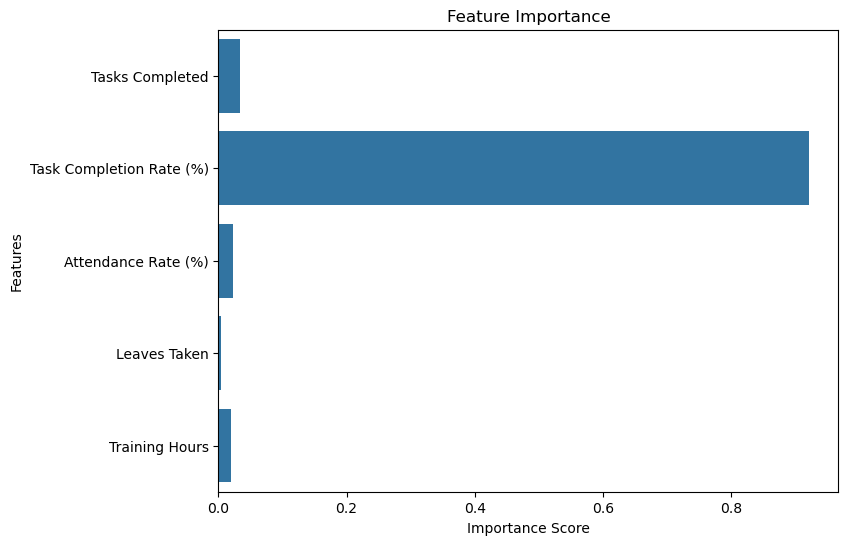

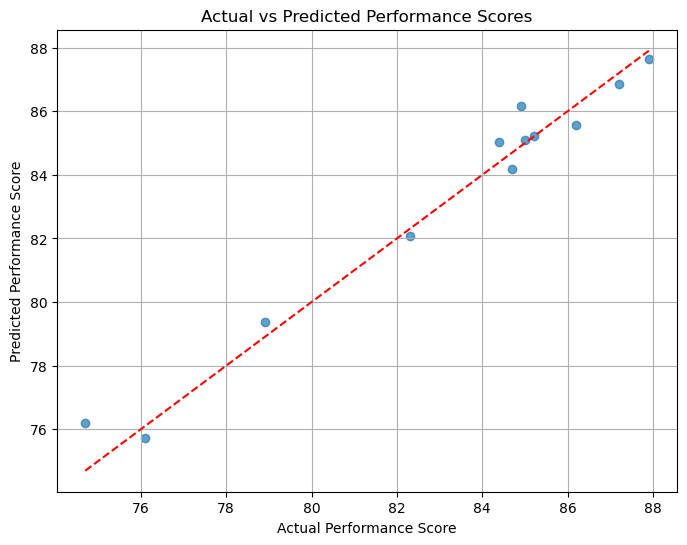

Predicted Performance: 86.7%


In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import joblib
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset from the specified path
dataset_path = "C:\\Users\\Devi B\\Desktop\\dataset.csv"
df = pd.read_csv(dataset_path)

# Define the target variable: Performance Score
df['Performance Score'] = (df['Task Completion Rate (%)'] * 0.6) + \
                          (df['Attendance Rate (%)'] * 0.3) + \
                          (df['Training Hours'] * 0.1)

# Define features (input) and target (output)
X = df[['Tasks Completed', 'Task Completion Rate (%)', 'Attendance Rate (%)', 'Leaves Taken', 'Training Hours']]
y = df['Performance Score']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest Regressor model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Save the trained model to a file for future use
model_filename = 'employee_performance_model.pkl'
joblib.dump(model, model_filename)
print(f"Model saved as {model_filename}")

# Evaluate model on test data
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R-squared Score: {r2}")

# Visualize Feature Importance
importance = model.feature_importances_
plt.figure(figsize=(8, 6))
sns.barplot(x=importance, y=X.columns)
plt.title('Feature Importance')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()

# Plot Actual vs Predicted Performance Scores
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Diagonal line
plt.title('Actual vs Predicted Performance Scores')
plt.xlabel('Actual Performance Score')
plt.ylabel('Predicted Performance Score')
plt.grid(True)
plt.show()

# Function to predict performance for a specific employee
def predict_employee_performance(employee_data):
    """
    Predict the performance score for a given employee based on their data.
    Parameters:
    employee_data (dict): A dictionary containing the employee's details.
    Returns:
    float: The predicted performance score.
    """
    features = pd.DataFrame([employee_data])
    predicted_performance = model.predict(features)[0]
    return round(predicted_performance, 2)

# Example usage: Predict performance for a specific employee
if __name__ == "__main__":
    # Example employee data (replace with actual employee details)
    example_employee = {
        'Tasks Completed': 120,  
        'Task Completion Rate (%)': 95,
        'Attendance Rate (%)': 98,
        'Leaves Taken': 2,
        'Training Hours': 8
    }

    predicted_performance = predict_employee_performance(example_employee)
    print(f'Predicted Performance: {predicted_performance}%')
